In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
GTFILE = '/raid/mpsych/CACTAS/DATA/ESUS/7.seg.nrrd'

In [4]:
CUSDATA = '/raid/mpsych/CACTAS/DATA/DACTAS/'

In [10]:
import nrrd
import cactas as C
import nibabel
import mahotas as mh

In [6]:
GT = nrrd.read(GTFILE)[0]

In [46]:
CACTAS_INDICES = [1,2,5,6,9,11]
SLICER_INDICES = [3,4,7,8,10,12]

In [48]:
C_JACCARD = []
for c in CACTAS_INDICES:
    segpath = CUSDATA + str(c) + '/07_seg.nii.gz'
    data = nibabel.load(segpath).get_fdata()
    data = C.Util.binarize(data)
    for i in range(1):
        data = mh.dilate(data)
    jaccard = C.Util.jaccard(C.Util.binarize(GT), data)
#     jaccard = C.Util.jaccard(C.Util.binarize(GT), C.Util.binarize(data))
    
    C_JACCARD.append(jaccard)

In [13]:
C_JACCARD

[0.20228384991843393,
 0.0,
 0.0,
 0.0,
 0.0020463847203274215,
 0.34934497816593885]

In [49]:
C_JACCARD #with dilation

[0.45118733509234826, 0.0, 0.0, 0.0, 0.0036068530207394047, 0.4]

In [15]:
np.mean(C_JACCARD)

0.09227920213411671

In [11]:
S_JACCARD = []
for c in SLICER_INDICES:
    segpath = CUSDATA + str(c) + '/Segmentation.seg.nrrd'
    data = nrrd.read(segpath)[0]
    jaccard = C.Util.jaccard(C.Util.binarize(GT), C.Util.binarize(data))
    
    S_JACCARD.append(jaccard)

In [12]:
S_JACCARD

[0.0,
 0.20945502298095864,
 0.27009222661396576,
 0.04082207207207207,
 0.10646900269541779,
 0.22964867180805484]

In [14]:
np.mean(S_JACCARD)

0.14274783269507818

In [7]:
# daniels
C_JACCARD2 = []
for c in [13]:
    segpath = CUSDATA + str(c) + '/07_seg.nii.gz'
    data = nibabel.load(segpath).get_fdata()
    jaccard = C.Util.jaccard(C.Util.binarize(GT), C.Util.binarize(data))
    
    C_JACCARD2.append(jaccard)

In [8]:
C_JACCARD2

[0.3283582089552239]

In [41]:
# daniels
C_JACCARD2 = []
for c in [13]:
    segpath = CUSDATA + str(c) + '/07_seg.nii.gz'
    data = nibabel.load(segpath).get_fdata()
    data = C.Util.binarize(data)
#     for i in range(1):
#         data = mh.dilate(data)
    jaccard = C.Util.jaccard(C.Util.binarize(GT), data)
    
    C_JACCARD2.append(jaccard)

In [40]:
C_JACCARD2 # with dilation

[0.547979797979798]

In [42]:
C_JACCARD2 # without dilation

[0.3283582089552239]

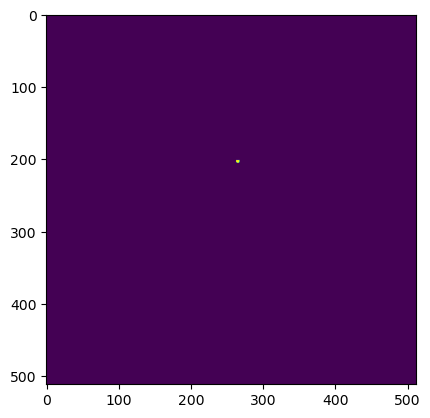

In [43]:
imshow(data[:,:,114])

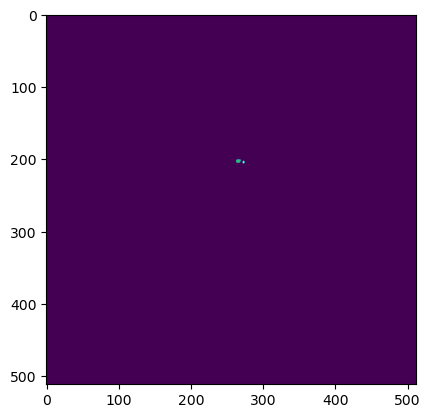

In [44]:
imshow(GT[:,:,114])